# Supply and Demand Analytics

The objective of this mini-project is to understand the supply to demand dynamic from an online service and answer the following questions:

- Do supply and demand match?
- Which are the hours of oversupply?
- Is it possible to shift some of the hours of oversupply to undersupply hours?

For this task we will use some Python libraries namely: Pandas (data frames), Numpy (Math computations), Matplotlib (plotting), and Seaborn (enhanced graphics).

In [9]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load supply sample from file
df_supply = pd.read_csv('./data/Hourly_DriverActivity_1.csv')

Before start, let's get acquainted with the dataset(s).

In [12]:
# Check supply dataframe
df_supply

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0
...,...,...,...,...,...,...,...,...,...
835,2016-11-14 04,15,6,0,6,6,0.4,0.00,NaN
836,2016-11-14 03,18,7,0,7,7,0.4,0.00,NaN
837,2016-11-14 02,21,7,0,7,9,0.3,0.14,1.0
838,2016-11-14 01,29,9,1,8,11,0.3,0.22,2.0


The _Supply_ dataset has 9 features (columns) with the following descriptions.

- **Date**: date & hour of the observation.
- **Active drivers**: number of active drivers (any level of activity) available during the observation.
- **Online**: total supply hours that were available during a period.
- **Has booking**: total hours during which drivers had a client booking (any state).
- **Waiting for booking**:  total hours which drivers spent waiting for booking.
- **Busy**: total hours which drivers were not available to take orders.
- **Hours per active driver**: Online / Active drivers.
- **Rides per online hour**: Finished Rides / Online.
- **Finished Rides**: number of finished trips during an observation.

In [13]:
# Load demand sample from file
df_demand = pd.read_csv('./data/Hourly_OverviewSearch_1.csv')

In [14]:
# Check demand dataframe
df_demand

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23,9,32,78
1,2016-12-18 22,29,64,69
2,2016-12-18 21,5,39,89
3,2016-12-18 20,13,48,79
4,2016-12-18 19,12,77,87
...,...,...,...,...
834,2016-11-14 04,4,4,50
835,2016-11-14 03,1,2,67
836,2016-11-14 02,3,6,67
837,2016-11-14 01,8,8,50


The _Demand_ dataset has 4 features with the following descriptions.

- **Date**: date & hour of the observation.
- **People saw 0 cars**: number of users who didn’t see a car when setting the pickup marker on the map. 
- **People saw +1 cars**: number of users who saw a car when setting the pickup marker on the map.
- **Coverage Ratio**: People saw +1 cars / (People saw +1 cars + People saw 0 cars).

As we can see the _Supply_ dataset has more rows than the _Demand_ one. We need to deal with the mismatch between them. Using the dataset with fewer observations as the basis we perform a left join, so we keep from the larger dataset only the observations present on the basis. But first, let's check for duplicates.

In [15]:
# Check for duplicates on demand dataset
df_demand[df_demand.duplicated(['Date'])] 

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)


No duplicates were found on the _Demand_ dataset based on the _Date_ column. Now we are ready to perform the left join.

In [16]:
# Merge using demand dataframe keys only
df = pd.merge(df_demand, df_supply, how='left', on=['Date', 'Date'])

# Check the result
df

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23,9,32,78,52,18,6,11,11,0.3,0.67,12.0
1,2016-12-18 22,29,64,69,59,20,11,9,12,0.3,1.40,28.0
2,2016-12-18 21,5,39,89,72,25,7,18,15,0.3,0.64,16.0
3,2016-12-18 20,13,48,79,86,29,7,23,15,0.3,0.52,15.0
4,2016-12-18 19,12,77,87,82,31,14,17,19,0.4,1.16,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...
834,2016-11-14 04,4,4,50,15,6,0,6,6,0.4,0.00,NaN
835,2016-11-14 03,1,2,67,18,7,0,7,7,0.4,0.00,NaN
836,2016-11-14 02,3,6,67,21,7,0,7,9,0.3,0.14,1.0
837,2016-11-14 01,8,8,50,29,9,1,8,11,0.3,0.22,2.0


Let's check each column's data type on the resulted dataset.

In [17]:
# Check columns types
df.dtypes

Date                            object
People saw 0 cars (unique)       int64
People saw +1 cars (unique)      int64
Coverage Ratio (unique)          int64
Active drivers                   int64
Online (h)                       int64
Has booking (h)                  int64
Waiting for booking (h)          int64
Busy (h)                         int64
Hours per active driver        float64
Rides per online hour          float64
Finished Rides                 float64
dtype: object

As we can see, the _Date column_ is an object type instead of DateTime. Let's handle this.

In [18]:
# Convert first column to DateTime
df['Date'] = pd.to_datetime(df_demand.Date,format="%Y-%m-%d %H")

# Check the result
df

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23:00:00,9,32,78,52,18,6,11,11,0.3,0.67,12.0
1,2016-12-18 22:00:00,29,64,69,59,20,11,9,12,0.3,1.40,28.0
2,2016-12-18 21:00:00,5,39,89,72,25,7,18,15,0.3,0.64,16.0
3,2016-12-18 20:00:00,13,48,79,86,29,7,23,15,0.3,0.52,15.0
4,2016-12-18 19:00:00,12,77,87,82,31,14,17,19,0.4,1.16,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...
834,2016-11-14 04:00:00,4,4,50,15,6,0,6,6,0.4,0.00,NaN
835,2016-11-14 03:00:00,1,2,67,18,7,0,7,7,0.4,0.00,NaN
836,2016-11-14 02:00:00,3,6,67,21,7,0,7,9,0.3,0.14,1.0
837,2016-11-14 01:00:00,8,8,50,29,9,1,8,11,0.3,0.22,2.0


Before moving on, let's perform the following:

- Convert the _Coverage Ratio_ values into decimals.
- Replace NaN's values of the _Finished Rides_ column by ZEROs.
- Convert _Finished Rides_ column values into integers.
- Create a new column with the  week number according to the _Date_ column.

In [19]:
# Convert Coverage Ratio to decimal
df['Coverage Ratio (unique)'] = df['Coverage Ratio (unique)']/100

# Replace NaN values with zero on the last column
df['Finished Rides'] = df['Finished Rides'].fillna(0)

# Convert column's values to integers
df['Finished Rides'] = df["Finished Rides"].astype(int)

# Create a new column with the week number
df.insert(1, 'Week', df['Date'].apply(lambda x: x.isocalendar()[1]))

# Check the result
df

,Date,Week,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23:00:00,50,9,32,0.78,52,18,6,11,11,0.3,0.67,12
1,2016-12-18 22:00:00,50,29,64,0.69,59,20,11,9,12,0.3,1.40,28
2,2016-12-18 21:00:00,50,5,39,0.89,72,25,7,18,15,0.3,0.64,16
3,2016-12-18 20:00:00,50,13,48,0.79,86,29,7,23,15,0.3,0.52,15
4,2016-12-18 19:00:00,50,12,77,0.87,82,31,14,17,19,0.4,1.16,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,2016-11-14 04:00:00,46,4,4,0.50,15,6,0,6,6,0.4,0.00,0
835,2016-11-14 03:00:00,46,1,2,0.67,18,7,0,7,7,0.4,0.00,0
836,2016-11-14 02:00:00,46,3,6,0.67,21,7,0,7,9,0.3,0.14,1
837,2016-11-14 01:00:00,46,8,8,0.50,29,9,1,8,11,0.3,0.22,2


### Compute the most undersupplied 36 hours each week

To get the most undersupplied 36 hours per week we first filter the data per week, then sort the _Coverage Ratio_ in ascending order. Below is an example using Week 50.

In [20]:
# Compute the most undersupplied 36 hours on Week 50
df[df['Week'] == 50].sort_values(by=['Coverage Ratio (unique)']).head(36)

,Date,Week,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
163,2016-12-12 04:00:00,50,6,0,0.00,9,2,0,2,4,0.2,0.00,0
162,2016-12-12 05:00:00,50,2,0,0.00,14,2,0,2,5,0.1,0.00,0
161,2016-12-12 06:00:00,50,10,2,0.17,17,4,1,4,6,0.2,0.25,1
116,2016-12-14 03:00:00,50,12,3,0.20,12,2,0,2,6,0.2,0.50,1
68,2016-12-16 03:00:00,50,59,18,0.23,23,6,3,2,11,0.3,1.00,6
58,2016-12-16 13:00:00,50,66,25,0.27,43,14,8,5,10,0.3,0.71,10
164,2016-12-12 03:00:00,50,5,2,0.29,12,3,0,3,3,0.3,0.00,0
135,2016-12-13 08:00:00,50,80,32,0.29,40,13,11,2,15,0.3,1.31,17
69,2016-12-16 02:00:00,50,59,26,0.31,34,12,8,4,8,0.4,1.25,15
56,2016-12-16 15:00:00,50,80,36,0.31,53,14,9,5,9,0.3,0.93,13


### Visualization of hours where there is a lack of supply during a weekly period

To get an idea of which hours of the day those most undersupplied 36 hours are present, we can make weekly plots.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

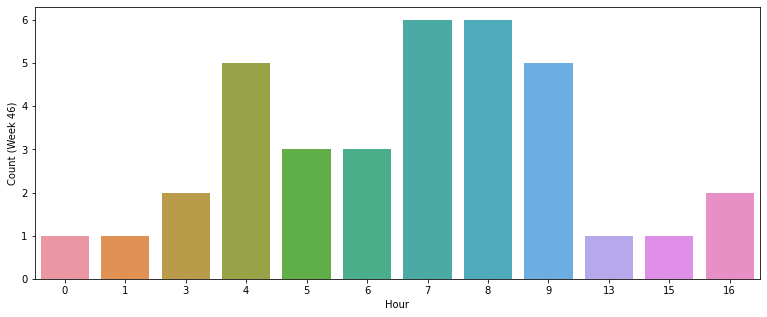

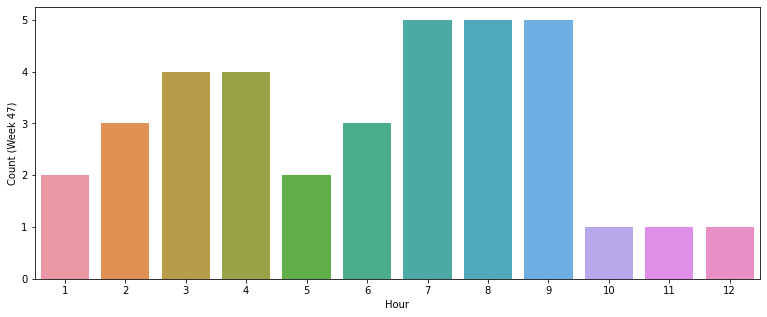

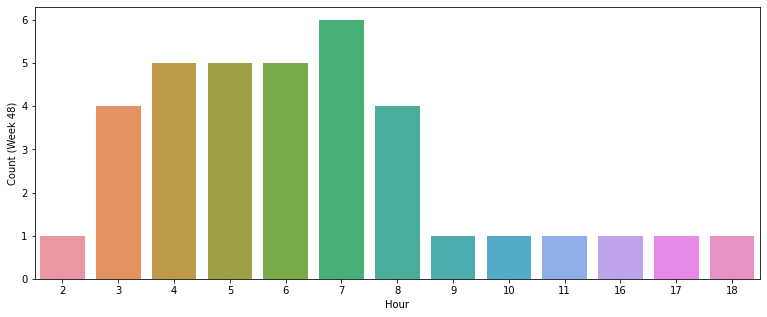

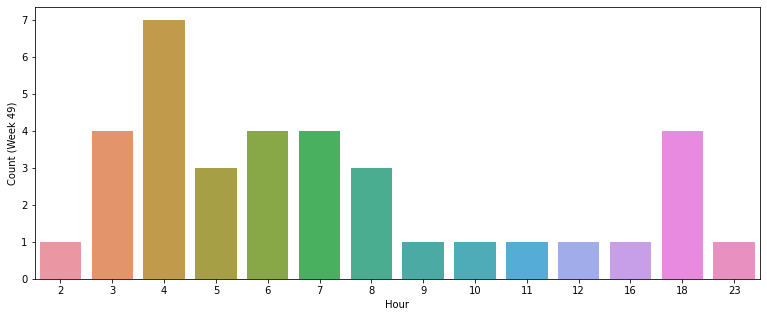

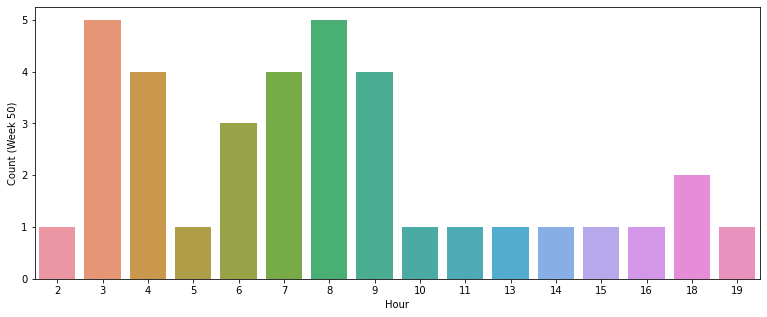

In [21]:
# Function to return hour of the timestamp
def hr_func(ts):
    return ts.hour

# Aggregate data by week #
for i in range(46,51):
    tmp = df[df['Week'] == i]
    tmp.insert(2, 'Hour', tmp['Date'].apply(hr_func))
    
    # Compute the most undersupplied 36 hours per week 
    x = tmp.sort_values(by=['Coverage Ratio (unique)']).head(36)
    fig, ax = plt.subplots(figsize=(13,5))
    sns.countplot(x['Hour'])
    plt.ylabel('Count (Week {})'.format(i))
    plt.xlabel('Hour')
    

As we can see from the graphs, on Week 46 from 07:00 to 10:00 is the time of day more undersupplied. Week 47 follows a similar trend. Week 48 is different, the most undersupplied period of the day is from 03:00 to 09:00. Weeks 49 and Week 50 follow a similar trend of Week 48.

### 24-hour graph of average supply and demand

To evaluate if there is a mismatch between supply and demand we aggregate the data weekly and compare hour by hour the average number of (supply) hours available and the average number of users who saw a car in the app when setting the pickup marker on the map, that means, requested the service, or didn’t see a car (and was unserved).

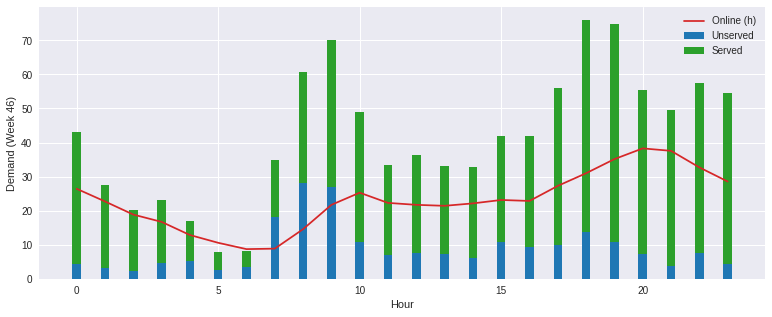

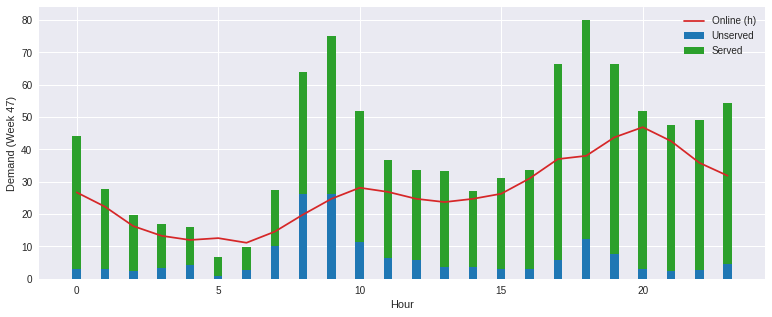

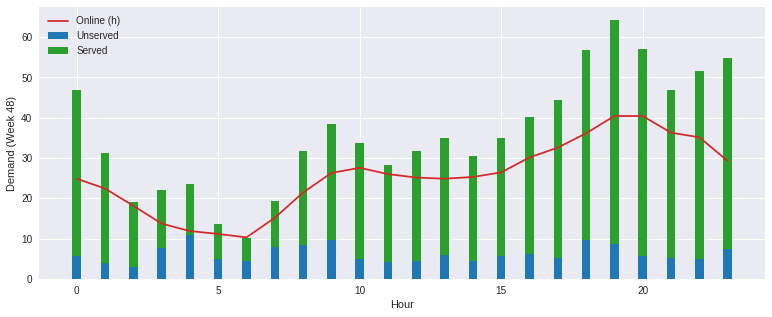

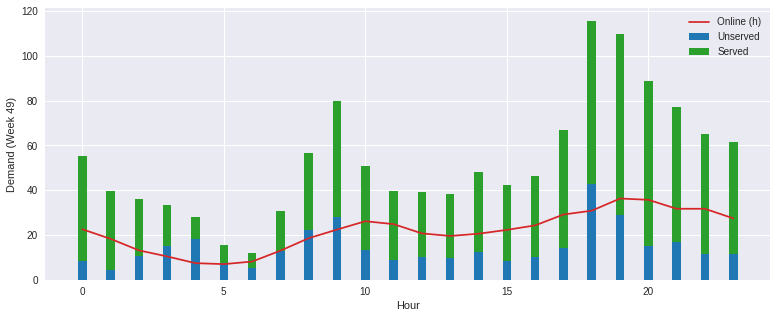

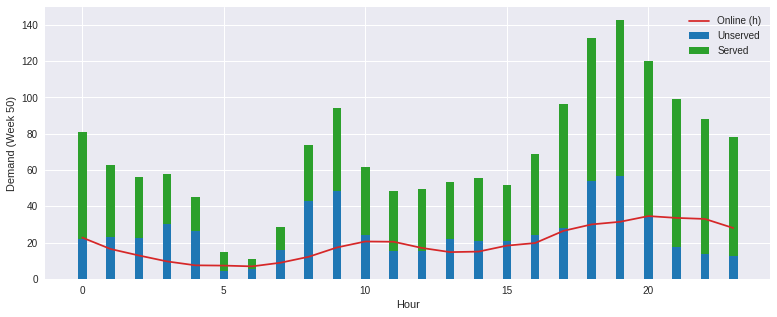

In [22]:
# Plot weekly demand

plt.style.use('seaborn')

# Aggregate data by week #

for i in range(46,51):
    tmp = df[df['Week'] == i]
    tmp.insert(2, 'Hour', tmp['Date'].apply(hr_func))
    uns = [] # create an empty list to store unserved people data
    ser = [] # create an empty list to store served people data
    onl = [] # create an empty list to store supply hours data
    
# Aggregate data by hour #

    for j in range(24):
        uns.append(np.mean(tmp['People saw 0 cars (unique)'][tmp['Hour'] == j]))
        ser.append(np.mean(tmp['People saw +1 cars (unique)'][tmp['Hour'] == j]))
        onl.append(np.mean(tmp['Online (h)'][tmp['Hour'] == j]))
        
    # Set position of bar on X axis
    r1 = np.arange(0,24)

    fig, ax = plt.subplots(figsize=(13, 5))
    plt.bar(r1, uns, width=0.3, color='tab:blue', align='center', label='Unserved')
    plt.bar(r1, ser, width=0.3, bottom=uns, color='tab:green', align='center', label='Served')
    plt.plot(r1, onl,color='tab:red',label='Online (h)')
    plt.ylabel('Demand (Week {})'.format(i))
    plt.xlabel('Hour')

    # Create legend & Show graphic
    plt.legend()
    plt.show()
          


Results show a mismatch between supply and demand from 07:00 to 10:00 where the average number of users who didn’t see a car in the application raised and the average number of (supply) hours available followed a decreasing trend until the beginning of the period. The increase in the average number of (supply) hours available after 07:00 did not seem to be sufficient since the average number of users who didn’t see a car in the app also increased.

### Estimate number of hours for high Coverage Ratio during peak

Analyzing the previous graphs we notice that the peak hours are from 18:00 to 21:00. We then create a subset using only the observation inside this interval.

In [82]:
tmp = df # create a new dataset from the original
tmp.insert(2, 'Hour', tmp['Date'].apply(hr_func)) # insert a new column named Hour
tmp = tmp[(tmp['Hour'] >= 18) & (tmp['Hour'] <= 20)] # select observation within peak interval

# Check the result
tmp

,Date,Week,Hour,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
3,2016-12-18 20:00:00,50,20,13,48,0.79,86,29,7,23,15,0.3,0.52,15
4,2016-12-18 19:00:00,50,19,12,77,0.87,82,31,14,17,19,0.4,1.16,36
5,2016-12-18 18:00:00,50,18,13,62,0.83,81,32,14,18,18,0.4,1.00,32
27,2016-12-17 20:00:00,50,20,48,84,0.64,88,32,19,13,22,0.4,1.50,48
28,2016-12-17 19:00:00,50,19,34,89,0.72,84,28,16,13,23,0.3,1.36,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2016-11-15 19:00:00,46,19,17,75,0.82,85,31,14,17,25,0.4,1.00,31
796,2016-11-15 18:00:00,46,18,13,60,0.82,78,29,13,16,23,0.4,0.93,27
818,2016-11-14 20:00:00,46,20,6,37,0.86,85,31,7,24,19,0.4,0.65,20
819,2016-11-14 19:00:00,46,19,10,54,0.84,94,33,9,24,21,0.4,0.48,16


Now let's check some statistics.

In [83]:
# Compute the descriptive statistics of the Coverage Ratio
tmp['Coverage Ratio (unique)'].describe()

count    105.000000
mean       0.816857
std        0.132123
min        0.370000
25%        0.770000
50%        0.850000
75%        0.900000
max        1.000000
Name: Coverage Ratio (unique), dtype: float64

As we can notice, the average _Coverage Ratio_ during peak hours is already high (0.8168). Nonetheless, if we want to estimate how many extra supply hours are needed for all observations below the average to reach a 0.8 _Coverage Ratio_, we ought to find a relationship between _Coverage Ratio_ and _Online (h)_. For that, we can build a scatter plot and fit a straight line.

Text(0, 0.5, 'Coverage Ratio')

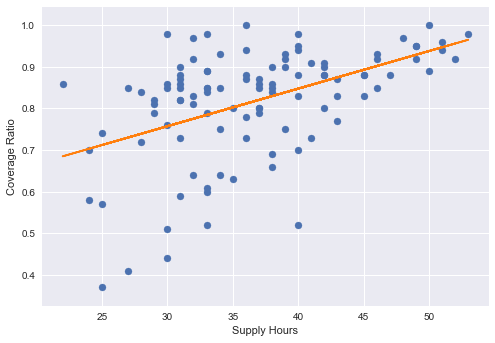

In [84]:
# Fit a linear model
m, b = np.polyfit(tmp['Online (h)'], tmp['Coverage Ratio (unique)'], 1)

# Graph the scatter plot and the fitted straight line
plt.scatter(tmp['Online (h)'],tmp['Coverage Ratio (unique)'])
plt.plot(tmp['Online (h)'], m*tmp['Online (h)'] + b, color='tab:orange' )
plt.xlabel('Supply Hours')
plt.ylabel('Coverage Ratio')

In [94]:
# Compute the average Coverage Ratio of all observations below average
avg = np.mean(tmp['Coverage Ratio (unique)'][tmp['Coverage Ratio (unique)']<=np.mean(tmp['Coverage Ratio (unique)'])])

# Compute the necessary number of extra supply hours necessary to reach a 0.8 Coverage Ratio
(0.8 - b)/m - (avg - b)/m 

13.660347849388316

Therefore we need (on average) 13.7 extra supply hours to reach a 0.8 Coverage Ratio

### Levels of hourly earnings

Now let's check the 36 weekly hours with the highest demand and see how much extra hours we need to capture missed demand. For that, we assume the following:
- From the finished rides, the driver's cut is on average €8.
- The level of demand with increased supply will not alter.
- Earnings calculation is base on the RPH over 3 hour periods after the supply hours are increased.
- Extra supply hours will capture all missed coverage.

We first create a new column with the sum of People saw 0 cars + People saw 1+ cars columns to represent the demand. Then we iterate through the weeks and filter the 36 hours with the highest demand. With this subset, we fit a linear model using supply hours as the explanatory variable and the number of people who did not see any car in the app as the response variable. With the model's parameters is easy to compute how much extra hours we need to fulfill the demand within 3 hour periods. Finally, we plot a bar graph for each week and compare the current earnings (per active driver) and the extra they would get if more supply hours are available.

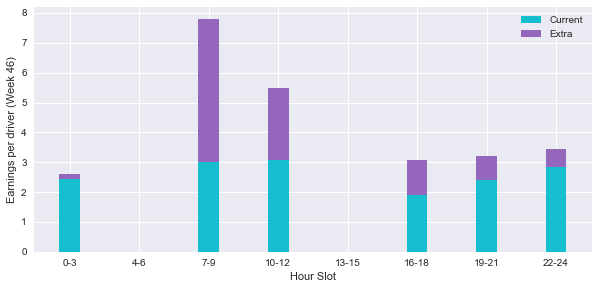

The average total earnings per driver are 4.27 Euros
The minimum total earnings per driver are 2.61 Euros


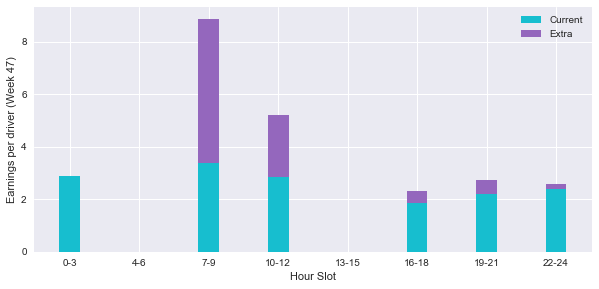

The average total earnings per driver are 4.11 Euros
The minimum total earnings per driver are 2.33 Euros


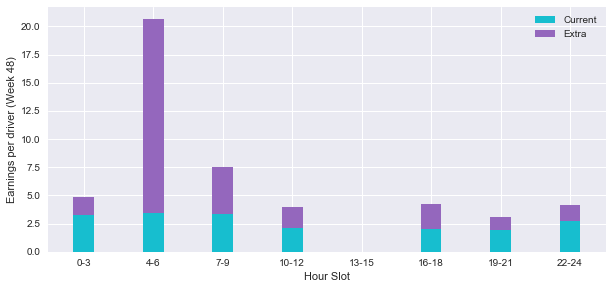

The average total earnings per driver are 6.93 Euros
The minimum total earnings per driver are 3.13 Euros


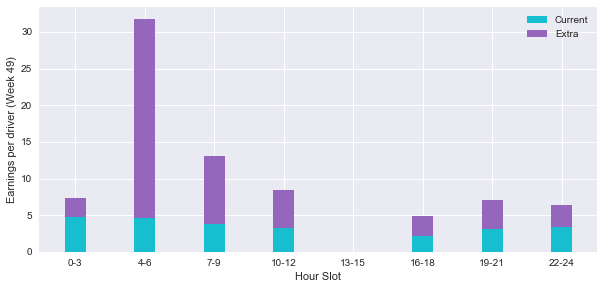

The average total earnings per driver are 11.27 Euros
The minimum total earnings per driver are 4.83 Euros


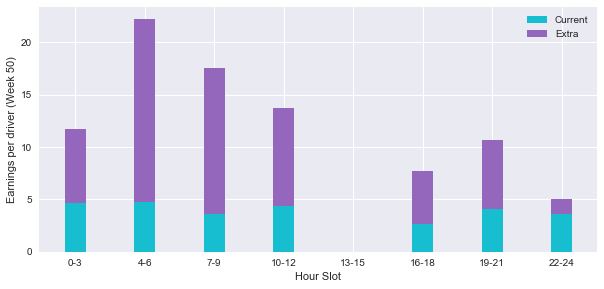

The average total earnings per driver are 12.66 Euros
The minimum total earnings per driver are 5.06 Euros


In [264]:
# Create a new column with the sum of People saw 0 cars + People saw 1+ cars columns
df.insert(4, 'Total People', df['People saw 0 cars (unique)'] + df['People saw +1 cars (unique)'])

# Aggregate data by week #

for i in range(46,51):
    # Compute the 36 weekly hours with highest demand
    tmp1 = df[df['Week'] == i].sort_values(by=['Total People'], ascending=False).head(36)
    # Create a new column with the hour of each observation
    tmp1.insert(2, 'Hour', tmp1['Date'].apply(hr_func))

    # Fit a linear model
    m1, b1 = np.polyfit(tmp1['Online (h)'], tmp1['People saw 0 cars (unique)'], 1)

    cur = []
    earn = []
    slots = ['0-3','4-6','7-9','10-12','13-15','16-18','19-21','22-24']

    for k in range(0,24,3):

        try:
            # Compute the average number of people who didn't see any car in the app
            avg1 = np.mean(tmp1['People saw 0 cars (unique)'][(tmp1['Hour'] >= k) & (tmp1['Hour'] < k+3)])
            # Compute the number of extra supply hours to capture “missed coverage”
            extra = (-b1/m1) - (avg1-b1)/m1
            # Compute RPH average
            mu = np.mean(tmp1['Rides per online hour'][(tmp1['Hour'] >= k) & (tmp1['Hour'] < k+3)])
            # Compute average number of active drivers
            drivers = np.mean(tmp1['Active drivers'][(tmp1['Hour'] >= k) & (tmp1['Hour'] < k+3)])
            # Compute extra hourly earnings per active driver
            earn.append((extra * mu * 8)/drivers) # 8 Euros per ride on average
            # Compute the average number of supply hours
            hor = np.mean(tmp1['Online (h)'][(tmp1['Hour'] >= k) & (tmp1['Hour'] < k+3)])
            # Compute current earnings per active driver
            cur.append((hor * mu * 8)/drivers)

        except:
            pass

    # set width of bar
    barWidth = 0.25

    # Set position of bar on X axis
    r1 = np.arange(0,8)
    r2 = [x + barWidth for x in r1]

    fig, ax = plt.subplots(figsize=(10, 4.5))
    plt.bar(r1, cur, width=0.3, color='tab:cyan', align='center', label='Current')
    plt.bar(r1, earn, width=0.3, bottom=cur, color='tab:purple', align='center', label='Extra')
    plt.ylabel('Earnings per driver (Week {})'.format(i))
    plt.xlabel('Hour Slot')
    plt.xticks([r + 0.0001 for r in range(len(slots))], slots)

    # Create legend & Show graphic
    plt.legend()
    plt.show()
    
    # Compute the average total earnings
    print("The average total earnings per driver are {0} Euros".format(np.round(np.nanmean([x + y for x, y in zip(cur, earn)]),2)))
    
    # Compute the minimum total earnings
    print("The minimum total earnings per driver are {0} Euros".format(np.round(np.nanmin([x + y for x, y in zip(cur, earn)]),2)))


From the previous results, we can see that the extra earnings per active driver increased in all circumstances except one (Week 47 from 00:00 to 03:00).

## Conclusion

In this task, we analyzed the demand and supply data from private car transport services within 5 weeks and realized that they didn't match in certain periods. Nonetheless, there are hours of oversupply, mainly in the first 3 weeks and between 19:00 and 21:00. We also checked that is profitable for the drivers to shift some hours of oversupply to undersupply (and over demanded) hours. 